<a href="https://colab.research.google.com/github/e11106013/KG/blob/main/RDF_%E4%BA%A4%E9%80%9A%E9%83%A8_%E9%81%8B%E8%BC%B8%E5%A0%B4%E7%AB%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  原始檔案下載至 https://link.motc.gov.tw/DownloadFile
  [運輸場站-總表](https://docs.google.com/spreadsheets/d/1qjJ_D8vvfxWA_WPFxYMS9_oOYPv1XGOZ_jtwnROmy88/edit?usp=drive_link)

  "交通部-運輸場站"資料內容如下表:

  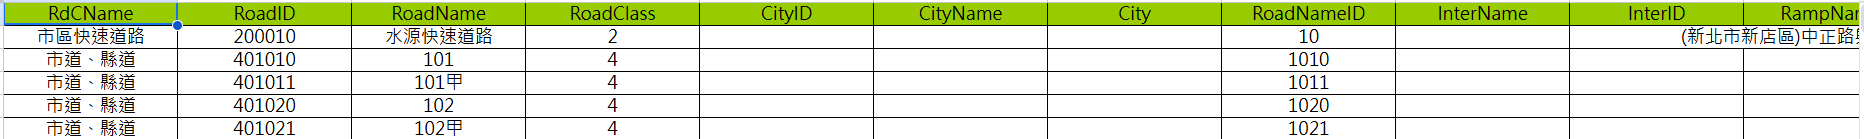

In [5]:
#@title 安裝必要的rdflib 套件
!pip install rdflib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 9.0 MB/s eta 0:00:00


In [6]:
#@title RDF建模
from rdflib import Graph, Literal, Namespace, URIRef
from rdflib.namespace import RDF, RDFS, XSD
import pandas as pd

# 建立 RDF graph
g = Graph()

# 定義命名空間
EX = Namespace("http://example.org/road/")
SCHEMA = Namespace("http://schema.org/")

# 在 RDF Turtle 檔案中加入對應的 @prefix 宣告
g.bind("ex", EX)            # '@prefix ex: <http://example.org/road/> .
g.bind("schema", SCHEMA)    # '@prefix schema: <http://schema.org/> .
g.bind("rdfs", RDFS)        # '@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
g.bind("xsd", XSD)          # '@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# 載入資料（在前面的那一段程式內容得到 df，這段略過）
# url = "https://docs.google.com/spreadsheets/d/1qjJ_D8vvfxWA_WPFxYMS9_oOYPv1XGOZ_jtwnROmy88/export?format=xlsx"
# df = pd.read_excel(BytesIO(requests.get(url).content))

for _, row in df.iterrows():
    # 以 RoadID 作為主體 URI
    subject = EX[str(row["RoadID"])]

    g.add((subject, RDF.type, SCHEMA.Route))
    g.add((subject, RDFS.label, Literal(row["RoadName"])))
    g.add((subject, EX.roadChineseName, Literal(row["RdCName"])))
    g.add((subject, EX.roadClass, Literal(row["RoadClass"])))
    g.add((subject, EX.cityID, Literal(row["CityID"])))
    g.add((subject, SCHEMA.addressLocality, Literal(row["CityName"])))
    g.add((subject, SCHEMA.addressRegion, Literal(row["City"])))
    g.add((subject, EX.roadNameID, Literal(row["RoadNameID"])))
    g.add((subject, EX.intersectionName, Literal(row["InterName"])))
    g.add((subject, EX.intersectionID, Literal(row["InterID"])))
    g.add((subject, EX.rampName, Literal(row["RampName"])))
    g.add((subject, EX.rampID, Literal(row["RampID"])))

    # 數值欄位加上類型判定
    if pd.notna(row["MileLength"]):
        g.add((subject, EX.mileLength, Literal(row["MileLength"], datatype=XSD.float)))
    if pd.notna(row["Length"]):
        g.add((subject, SCHEMA.length, Literal(row["Length"], datatype=XSD.float)))

    g.add((subject, EX.version, Literal(row["Version"])))

    if pd.notna(row["UpdateDate"]):
        g.add((subject, SCHEMA.dateModified, Literal(str(row["UpdateDate"].date()), datatype=XSD.date)))

    g.add((subject, SCHEMA.description, Literal(row["UpdateNote"])))

# 儲存為 Turtle 檔案
g.serialize(destination="transport_stations.ttl", format="turtle")


<Graph identifier=N9b289ab7ee6a403dbf14d499ba030bfb (<class 'rdflib.graph.Graph'>)>

In [7]:
#@title List all triples
for s, p, o in g:
   print((s, p, o))

Streaming output truncated to the last 5000 lines.
(rdflib.term.URIRef('http://example.org/road/636491H'), rdflib.term.URIRef('http://example.org/road/rampName'), rdflib.term.Literal('nan', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')))
(rdflib.term.URIRef('http://example.org/road/627619F'), rdflib.term.URIRef('http://schema.org/dateModified'), rdflib.term.Literal('2024-11-22', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#date')))
(rdflib.term.URIRef('http://example.org/road/606198B'), rdflib.term.URIRef('http://example.org/road/rampName'), rdflib.term.Literal('nan', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')))
(rdflib.term.URIRef('http://example.org/road/630492G'), rdflib.term.URIRef('http://example.org/road/intersectionName'), rdflib.term.Literal('nan', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')))
(rdflib.term.URIRef('http://example.org/road/636790H'), rdflib.term.URIRef('http://example

In [9]:
#@title RDF/XML format
# print(g.serialize(format="xml"))